In [1]:
using EcologicalNetworks

┌ Info: Precompiling EcologicalNetworks [f03a62fe-f8ab-5b77-a061-bb599b765229]
└ @ Base loading.jl:1242


In [2]:
web_of_life()

236-element Array{NamedTuple{(:ID, :Species, :Interactions, :Connectance, :Type_of_interactions, :Type_of_data, :Reference, :Locality_of_Study, :Latitude, :Longitude),T} where T<:Tuple,1}:
 (ID = "A_HP_001", Species = 28, Interactions = 61, Connectance = 0.339, Type_of_interactions = "Host-Parasite", Type_of_data = 1, Reference = "Hadfield JD, Krasnov BR, Poulin R, Shinichi N (2013) A tale of two phylogenies: comparative analyses of ecological interactions. The American Naturalist 183(2): 174-187", Locality_of_Study = "Adzharia", Latitude = 42, Longitude = 42.65)                                                                                                            
 (ID = "A_HP_002", Species = 42, Interactions = 96, Connectance = 0.222, Type_of_interactions = "Host-Parasite", Type_of_data = 1, Reference = "Hadfield JD, Krasnov BR, Poulin R, Shinichi N (2013) A tale of two phylogenies: comparative analyses of ecological interactions. The American Naturalist 183(2): 174-187", Localit

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


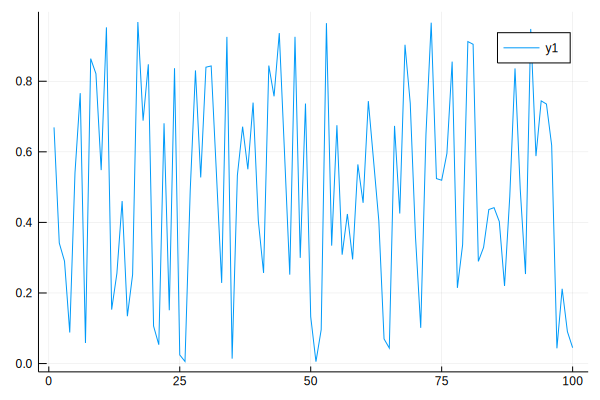

In [5]:
using Plots
plot(rand(100))